In [1]:
import pandas as pd
import boto3

import numpy as np

# Import necessary library for color palette
from matplotlib.colors import LinearSegmentedColormap

from dotenv import load_dotenv
import os
from io import StringIO
pd.set_option("display.max_columns", 50)
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
# which style sheet to use 
style.use('ggplot')

# import ipywidgets library for creating widgets
import ipywidgets as widgets

In [2]:
aws_access_key_id = os.getenv("AWS_ACCESS_KEY")
aws_secret_key = os.getenv("AWS_SECRET_KEY")

In [3]:
def read_csv_from_s3(bucket: str, path: str, filename: str) -> pd.DataFrame:
    """
    Reads a CSV file from an S3 bucket and returns it as a pandas DataFrame.

    Parameters:
        bucket (str): 
            The name of the S3 bucket.
        path (str): 
            The path within the S3 bucket where the file is located.
        filename (str): 
            The name of the CSV file.

    Returns:
        pd.DataFrame: DataFrame containing the contents of the CSV file.

    """
    s3 = boto3.client('s3', aws_access_key_id = aws_access_key_id, aws_secret_access_key = aws_secret_key)
    
    full_path = f'{path}{filename}'
    
    object = s3.get_object(Bucket=bucket, Key=full_path)
    object = object['Body'].read().decode('utf-8')
    output_df = pd.read_csv(StringIO(object))
    
    return output_df

In [4]:
s3 = boto3.client('s3', aws_access_key_id = aws_access_key_id, aws_secret_access_key = aws_secret_key)
bucket = 'cubix-chicago-taxi-rr'

community_areas_path = 'transformed_data/community_areas/'
company_path = 'transformed_data/company/'
date_path = 'transformed_data/date/'
payment_type_path = 'transformed_data/payment_type/'
taxi_trips_path = 'transformed_data/taxi_trips/'
weather_path = 'transformed_data/weather/'

In [5]:
community_areas = read_csv_from_s3(bucket=bucket, path=community_areas_path, filename='community_areas_master.csv')
company = read_csv_from_s3(bucket=bucket, path=company_path, filename='company_master.csv')
date = read_csv_from_s3(bucket=bucket, path=date_path, filename='data_dimension.csv')
payment_type = read_csv_from_s3(bucket=bucket, path=payment_type_path, filename='payment_type_master.csv')

In [6]:
trips_list = []
weather_list = []

In [7]:
trips_list = []

for file in s3.list_objects(Bucket=bucket, Prefix=taxi_trips_path)['Contents']:
    taxi_trip_key = file ['Key']

    if taxi_trip_key.split("/")[-1].strip() !='':
        if taxi_trip_key.split('.')[1] == 'csv':
            
            filename = taxi_trip_key.split("/")[-1]
            #print(filename)
            trip = read_csv_from_s3(bucket, taxi_trips_path, filename)

            trips_list.append(trip)
            print(f"{filename} has been added.")

taxi_2023-12-03.csv has been added.
taxi_2023-12-04.csv has been added.
taxi_2023-12-05.csv has been added.
taxi_2023-12-06.csv has been added.
taxi_2023-12-07.csv has been added.
taxi_2023-12-08.csv has been added.
taxi_2023-12-09.csv has been added.
taxi_2023-12-10.csv has been added.
taxi_2023-12-11.csv has been added.
taxi_2023-12-12.csv has been added.
taxi_2023-12-13.csv has been added.
taxi_2023-12-14.csv has been added.
taxi_2023-12-15.csv has been added.
taxi_2023-12-16.csv has been added.
taxi_2023-12-17.csv has been added.
taxi_2023-12-18.csv has been added.
taxi_2023-12-19.csv has been added.
taxi_2023-12-20.csv has been added.


In [8]:
trips = pd.concat(trips_list, ignore_index=True)

In [9]:
trips.head()

,trip_id,taxi_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,fare,tips,tolls,extras,trip_total,pickup_community_area_id,dropoff_community_area_id,pickup_centroid_latitude,pickup_centroid_longitude,dropoff_centroid_latitude,dropoff_centroid_longitude,datetime_for_weather,payment_type_id,company_id
0,ff109e00fb81239606eca1acec411db0eb3c70df,31261f6e7fc645eff98c7964c7ea71a0ea7e387a6bd7f8...,2023-12-03T23:45:00.000,2023-12-03T23:45:00.000,360,0.50,5.00,0.00,0.0,4.5,9.50,8,32,41.892508,-87.626215,41.884987,-87.620993,2023-12-03 23:00:00,1,2
1,f60813d29947103bf21fe771ff8ae30e3b59d062,8063b041e0d6272293d52b8d81343464e62e7fa3a9e900...,2023-12-03T23:45:00.000,2023-12-04T00:00:00.000,1312,17.61,43.25,9.75,0.0,5.0,58.50,76,8,41.980264,-87.913625,41.899602,-87.633308,2023-12-03 23:00:00,1,7
2,e3fded002873476bdc0b39bde244c406506d46c8,093e9e4c05ea53bf75c51763839d5f5bd5d1785c11ee5e...,2023-12-03T23:45:00.000,2023-12-03T23:45:00.000,268,0.91,5.75,4.00,0.0,1.5,11.75,8,32,41.892508,-87.626215,41.880994,-87.632746,2023-12-03 23:00:00,1,8
3,e35a449ec6ea1fa64a22c0db18a20d2bb25692e4,2e82e26afb77e809fe4a44b02a152bdc079623600ae1b7...,2023-12-03T23:45:00.000,2023-12-04T00:00:00.000,1080,0.60,26.75,5.00,0.0,6.0,37.75,56,33,41.792592,-87.769615,41.857184,-87.620335,2023-12-03 23:00:00,1,2
4,e36a934e656a0c8ea395b331c17a903906402642,02ef8f01232b1b1828f4e5e1b8e8a85cd71b67c449afaf...,2023-12-03T23:45:00.000,2023-12-04T00:15:00.000,1692,10.07,29.00,0.00,0.0,0.0,29.00,44,34,41.740206,-87.615970,41.842076,-87.633973,2023-12-03 23:00:00,5,8


In [10]:
weather_list = []

for file in s3.list_objects(Bucket=bucket, Prefix=weather_path)['Contents']:
    weather_key = file['Key']
    
    if weather_key.split("/")[-1].strip() !='':
        if weather_key.split('.')[1] == 'csv':
            
            filename = weather_key.split('/')[-1]
            #print(filename)
            weather_daily = read_csv_from_s3(bucket, weather_path, filename)

            weather_list.append(weather_daily)
            print(f"{filename} has been added.")

weather_2023-12-03.csv has been added.
weather_2023-12-04.csv has been added.
weather_2023-12-05.csv has been added.
weather_2023-12-06.csv has been added.
weather_2023-12-07.csv has been added.
weather_2023-12-08.csv has been added.
weather_2023-12-09.csv has been added.
weather_2023-12-10.csv has been added.
weather_2023-12-11.csv has been added.
weather_2023-12-12.csv has been added.
weather_2023-12-13.csv has been added.
weather_2023-12-14.csv has been added.
weather_2023-12-15.csv has been added.
weather_2023-12-16.csv has been added.
weather_2023-12-17.csv has been added.
weather_2023-12-18.csv has been added.
weather_2023-12-19.csv has been added.
weather_2023-12-20.csv has been added.


In [40]:
weather = pd.concat(weather_list, ignore_index=True)

In [41]:
weather.head()

,datetime,temperature,wind_speed,precipitation,rain
0,2023-12-03 00:00:00,4.8,7.9,0.0,0.0
1,2023-12-03 01:00:00,4.6,6.9,0.0,0.0
2,2023-12-03 02:00:00,4.5,8.3,0.0,0.0
3,2023-12-03 03:00:00,4.7,8.5,0.0,0.0
4,2023-12-03 04:00:00,4.7,9.2,0.0,0.0


In [42]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432 entries, 0 to 431
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   datetime       432 non-null    object 
 1   temperature    432 non-null    float64
 2   wind_speed     432 non-null    float64
 3   precipitation  432 non-null    float64
 4   rain           432 non-null    float64
dtypes: float64(4), object(1)
memory usage: 17.0+ KB


# Join them together

In [43]:
print(weather.columns)
print(weather.head())


Index(['datetime', 'temperature', 'wind_speed', 'precipitation', 'rain'], dtype='object')
              datetime  temperature  wind_speed  precipitation  rain
0  2023-12-03 00:00:00          4.8         7.9            0.0   0.0
1  2023-12-03 01:00:00          4.6         6.9            0.0   0.0
2  2023-12-03 02:00:00          4.5         8.3            0.0   0.0
3  2023-12-03 03:00:00          4.7         8.5            0.0   0.0
4  2023-12-03 04:00:00          4.7         9.2            0.0   0.0


In [44]:
if 'datetime' in weather.columns:
    print('Datetime column exists.')
else:
    print('Datetime column is missing.')

Datetime column exists.


In [45]:
trips_full = pd.merge(trips, weather, left_on='datetime_for_weather', right_on='datetime', how='inner')
trips_full = trips_full.drop(columns=['datetime'])

In [46]:
trips_full = pd.merge(trips_full, company, left_on='company_id', right_on='company_id', how='inner')
trips_full = trips_full.drop(columns=['company_id'])

In [47]:
trips_full = pd.merge(trips_full, payment_type, left_on='payment_type_id', right_on='payment_type_id', how='inner')
trips_full = trips_full.drop(columns=['payment_type_id'])

In [48]:
trips_full = pd.merge(trips_full, community_areas, left_on='pickup_community_area_id', right_on='area_code', how='inner')
trips_full = trips_full.drop(columns=['pickup_community_area_id', 'area_code'])
trips_full.rename(columns={'community_name':'pickup_community_area_name'}, inplace=True)

In [49]:
trips_full = pd.merge(trips_full, community_areas, left_on='dropoff_community_area_id', right_on='area_code', how='inner')
trips_full = trips_full.drop(columns=['dropoff_community_area_id','area_code'])
trips_full.rename(columns={'community_name':'dropoff_community_area_name'}, inplace=True)

In [50]:
date['date'] = pd.to_datetime(date['date'])
trips_full['trip_end_timestamp'] = pd.to_datetime(trips_full['trip_end_timestamp'])

trips_full['trip_start_date'] = trips_full['trip_end_timestamp'].dt.date   # DATE(column)
trips_full['trip_start_date'] = pd.to_datetime(trips_full['trip_start_date'])


In [51]:
trips_full.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275980 entries, 0 to 275979
Data columns (total 25 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   trip_id                      275980 non-null  object        
 1   taxi_id                      275980 non-null  object        
 2   trip_start_timestamp         275980 non-null  object        
 3   trip_end_timestamp           275980 non-null  datetime64[ns]
 4   trip_seconds                 275980 non-null  int64         
 5   trip_miles                   275980 non-null  float64       
 6   fare                         275980 non-null  float64       
 7   tips                         275980 non-null  float64       
 8   tolls                        275980 non-null  float64       
 9   extras                       275980 non-null  float64       
 10  trip_total                   275980 non-null  float64       
 11  pickup_centroid_latitude  

In [52]:
trips_full.head()

,trip_id,taxi_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,fare,tips,tolls,extras,trip_total,pickup_centroid_latitude,pickup_centroid_longitude,dropoff_centroid_latitude,dropoff_centroid_longitude,datetime_for_weather,temperature,wind_speed,precipitation,rain,company,payment_type,pickup_community_area_name,dropoff_community_area_name,trip_start_date
0,ff109e00fb81239606eca1acec411db0eb3c70df,31261f6e7fc645eff98c7964c7ea71a0ea7e387a6bd7f8...,2023-12-03T23:45:00.000,2023-12-03 23:45:00,360,0.50,5.00,0.00,0.0,4.5,9.50,41.892508,-87.626215,41.884987,-87.620993,2023-12-03 23:00:00,3.6,19.1,0.0,0.0,Taxi Affiliation Services,Credit Card,Near North Side,Loop,2023-12-03
1,f60813d29947103bf21fe771ff8ae30e3b59d062,8063b041e0d6272293d52b8d81343464e62e7fa3a9e900...,2023-12-03T23:45:00.000,2023-12-04 00:00:00,1312,17.61,43.25,9.75,0.0,5.0,58.50,41.980264,-87.913625,41.899602,-87.633308,2023-12-03 23:00:00,3.6,19.1,0.0,0.0,Taxicab Insurance Agency Llc,Credit Card,O'Hare,Near North Side,2023-12-04
2,e3fded002873476bdc0b39bde244c406506d46c8,093e9e4c05ea53bf75c51763839d5f5bd5d1785c11ee5e...,2023-12-03T23:45:00.000,2023-12-03 23:45:00,268,0.91,5.75,4.00,0.0,1.5,11.75,41.892508,-87.626215,41.880994,-87.632746,2023-12-03 23:00:00,3.6,19.1,0.0,0.0,City Service,Credit Card,Near North Side,Loop,2023-12-03
3,e35a449ec6ea1fa64a22c0db18a20d2bb25692e4,2e82e26afb77e809fe4a44b02a152bdc079623600ae1b7...,2023-12-03T23:45:00.000,2023-12-04 00:00:00,1080,0.60,26.75,5.00,0.0,6.0,37.75,41.792592,-87.769615,41.857184,-87.620335,2023-12-03 23:00:00,3.6,19.1,0.0,0.0,Taxi Affiliation Services,Credit Card,Garfield Ridge,Near South Side,2023-12-04
4,e36a934e656a0c8ea395b331c17a903906402642,02ef8f01232b1b1828f4e5e1b8e8a85cd71b67c449afaf...,2023-12-03T23:45:00.000,2023-12-04 00:15:00,1692,10.07,29.00,0.00,0.0,0.0,29.00,41.740206,-87.615970,41.842076,-87.633973,2023-12-03 23:00:00,3.6,19.1,0.0,0.0,City Service,Prcard,Chatham,Armour Square,2023-12-04


In [53]:
trips_full = pd.merge(trips_full, date, left_on='trip_start_date', right_on='date', how='inner')
trips_full = trips_full.drop(columns=['date'])

In [54]:
trips_full.head()

,trip_id,taxi_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,fare,tips,tolls,extras,trip_total,pickup_centroid_latitude,pickup_centroid_longitude,dropoff_centroid_latitude,dropoff_centroid_longitude,datetime_for_weather,temperature,wind_speed,precipitation,rain,company,payment_type,pickup_community_area_name,dropoff_community_area_name,trip_start_date,year,month,day,day_of_week,is_weekend
0,ff109e00fb81239606eca1acec411db0eb3c70df,31261f6e7fc645eff98c7964c7ea71a0ea7e387a6bd7f8...,2023-12-03T23:45:00.000,2023-12-03 23:45:00,360,0.50,5.00,0.00,0.0,4.5,9.50,41.892508,-87.626215,41.884987,-87.620993,2023-12-03 23:00:00,3.6,19.1,0.0,0.0,Taxi Affiliation Services,Credit Card,Near North Side,Loop,2023-12-03,2023,12,3,7,True
1,f60813d29947103bf21fe771ff8ae30e3b59d062,8063b041e0d6272293d52b8d81343464e62e7fa3a9e900...,2023-12-03T23:45:00.000,2023-12-04 00:00:00,1312,17.61,43.25,9.75,0.0,5.0,58.50,41.980264,-87.913625,41.899602,-87.633308,2023-12-03 23:00:00,3.6,19.1,0.0,0.0,Taxicab Insurance Agency Llc,Credit Card,O'Hare,Near North Side,2023-12-04,2023,12,4,1,False
2,e3fded002873476bdc0b39bde244c406506d46c8,093e9e4c05ea53bf75c51763839d5f5bd5d1785c11ee5e...,2023-12-03T23:45:00.000,2023-12-03 23:45:00,268,0.91,5.75,4.00,0.0,1.5,11.75,41.892508,-87.626215,41.880994,-87.632746,2023-12-03 23:00:00,3.6,19.1,0.0,0.0,City Service,Credit Card,Near North Side,Loop,2023-12-03,2023,12,3,7,True
3,e35a449ec6ea1fa64a22c0db18a20d2bb25692e4,2e82e26afb77e809fe4a44b02a152bdc079623600ae1b7...,2023-12-03T23:45:00.000,2023-12-04 00:00:00,1080,0.60,26.75,5.00,0.0,6.0,37.75,41.792592,-87.769615,41.857184,-87.620335,2023-12-03 23:00:00,3.6,19.1,0.0,0.0,Taxi Affiliation Services,Credit Card,Garfield Ridge,Near South Side,2023-12-04,2023,12,4,1,False
4,e36a934e656a0c8ea395b331c17a903906402642,02ef8f01232b1b1828f4e5e1b8e8a85cd71b67c449afaf...,2023-12-03T23:45:00.000,2023-12-04 00:15:00,1692,10.07,29.00,0.00,0.0,0.0,29.00,41.740206,-87.615970,41.842076,-87.633973,2023-12-03 23:00:00,3.6,19.1,0.0,0.0,City Service,Prcard,Chatham,Armour Square,2023-12-04,2023,12,4,1,False


Extras of the Hourly weather data

In [26]:
def precipitation(row):
    if row["rain"] != row["precipitation"]:
        val = "Other"
    elif row["rain"] > 0:
        val = "Rainy"
    else:
        val = "No"
    return val

In [56]:
weather["hour"] = pd.to_datetime(weather["datetime"]).dt.hour
weather['is_rainy'] = weather.apply(precipitation, axis=1)
weather.info()
weather.sample()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432 entries, 0 to 431
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   datetime       432 non-null    object 
 1   temperature    432 non-null    float64
 2   wind_speed     432 non-null    float64
 3   precipitation  432 non-null    float64
 4   rain           432 non-null    float64
 5   hour           432 non-null    int32  
 6   is_rainy       432 non-null    object 
dtypes: float64(4), int32(1), object(2)
memory usage: 22.1+ KB


,datetime,temperature,wind_speed,precipitation,rain,hour,is_rainy
380,2023-12-18 20:00:00,-1.0,33.6,0.0,0.0,20,No


# Visualisation
    

Analysing the weekdays

In [57]:
trips_per_day = trips_full.groupby(["trip_start_date", "day_of_week"]).agg(trip_count = ("trip_id", "count"))
trips_per_weekday = trips_per_day.groupby("day_of_week").trip_count.mean()

trips_per_weekday

day_of_week
1    14235.000000
2    16971.666667
3    17624.000000
4    12838.666667
5    17595.000000
6    12728.000000
7    10108.666667
Name: trip_count, dtype: float64

# Daily Trip Counts

This code creates a bar chart that displays the number of taxi trips for each day of the week. The chart includes the following elements:

Custom Color Palette: A custom color palette is applied, featuring ten different colors to distinguish the bars on the chart.

Weekday: The days of the week are represented on the X-axis.

Count of the Trips: The number of taxi trips recorded on each day, displayed on the Y-axis.

Title and Labels: The chart title ("Daily trip counts") and axis labels improve the readability and understanding of the plot.

This visualization helps to understand which days have the highest taxi traffic based on the number of trips.

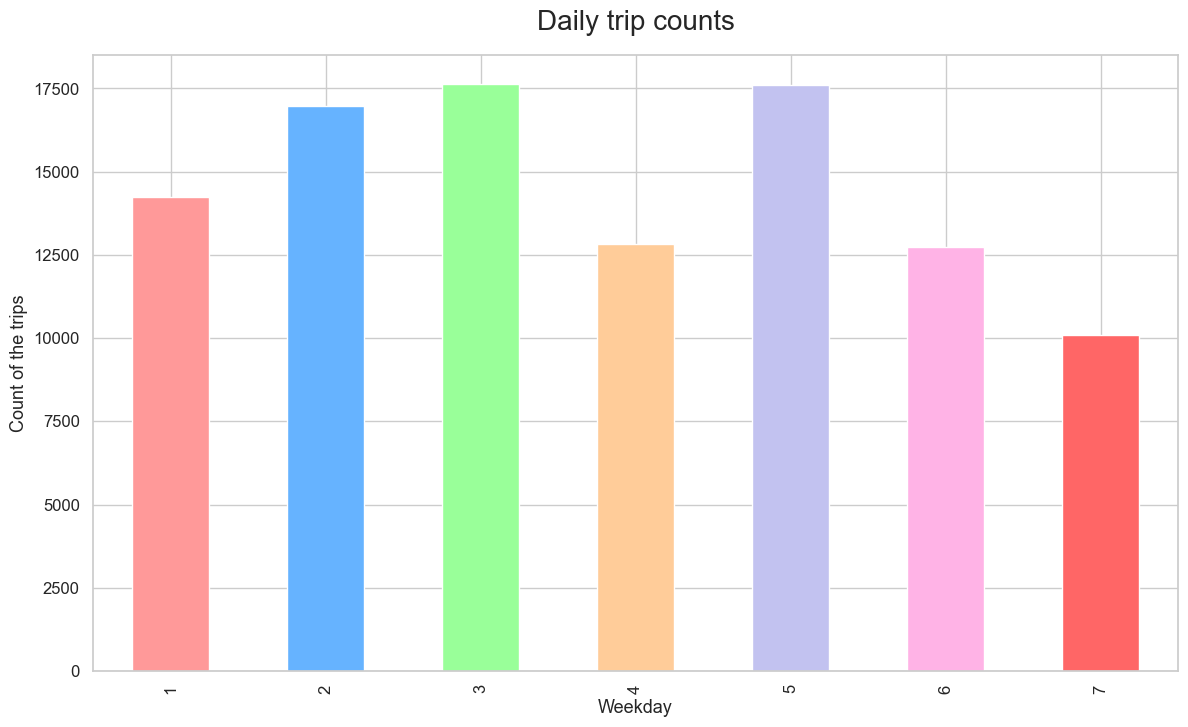

In [58]:
# Define a custom color palette
color_palette = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6', '#ff6666', '#ffb366', '#b3b3ff', '#66ff66']

# Plotting the data
trips_per_weekday.plot(kind="bar", figsize=(14, 8), fontsize=12, color=color_palette)

# Adding titles and labels
plt.xlabel("Weekday", fontsize = 13)
plt.ylabel("Count of the trips", fontsize = 13)
plt.title("Daily trip counts", fontsize = 20, pad = 18)

# Show and save the plot into a file
figure = plt.gcf()

plt.show()

# Distribution of Trip Durations

Description:
This code creates a visualization that shows the distribution of taxi trip durations. The plot includes the following elements:

Visualization Style: The style of the plots is set with sns.set(style="whitegrid"), which provides a clean and organized background.

Custom Color Palette: A custom color palette is applied, with the histogram bars in blue (#1f77b4) and the KDE curve in orange (#ff7f0e).

Histogram and KDE Plot: The distribution of trip durations is displayed using a histogram, complemented by a smoothed KDE curve. The histogram bars are semi-transparent (with an alpha value of 0.6), while the KDE curve is shown with a thicker line.

Titles and Labels: The plot title ("Distribution of Trip Durations") is displayed in bold, and the axis labels clearly indicate the content: trip duration in seconds on the X-axis and frequency on the Y-axis.

This visualization helps in understanding the typical values and frequencies of trip durations

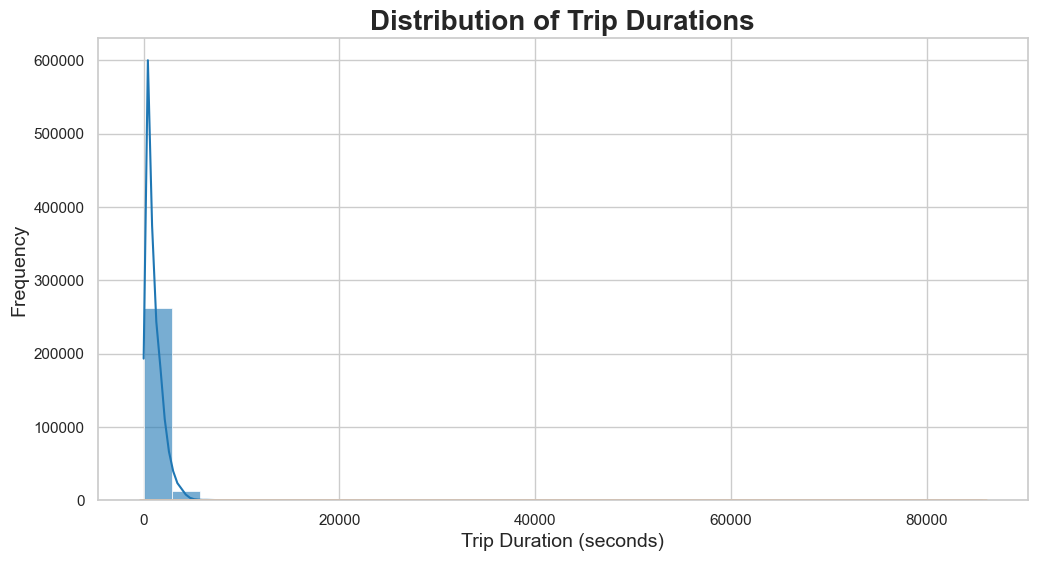

In [59]:
# Set the style of the visualizations
sns.set(style="whitegrid")

# Define custom color palette
hist_color = '#1f77b4'  # A nice blue color for the histogram bars
kde_color = '#ff7f0e'   # A complementary orange color for the KDE curve

# Example 1: Distribution of Trip Durations
plt.figure(figsize=(12, 6))
sns.histplot(trips_full['trip_seconds'], bins=30, kde=True, color=hist_color, alpha=0.6, linewidth=0.5)

# Add KDE curve with a different color
sns.kdeplot(trips_full['trip_seconds'], color=kde_color, linewidth=2)

# Adding titles and labels
plt.title('Distribution of Trip Durations', fontsize=20, fontweight='bold')
plt.xlabel('Trip Duration (seconds)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Show the plot
plt.show()


# Number of Trips per Day

This code generates a line plot showing the number of taxi trips per day. The plot includes the following elements:

Data Aggregation: The number of trips per day is computed by grouping the data by trip_start_date and counting the occurrences. This aggregated data is then used for plotting.

Line Plot: A line plot is created with trip_start_date on the X-axis and the number of trips (num_trips) on the Y-axis. The plot visualizes the daily variations in trip counts.

Title and Labels: The plot is titled "Number of Trips per Day" with X-axis labeled as "Date" and Y-axis labeled as "Number of Trips." The X-axis labels are rotated by 45 degrees for better readability.

Top 10 Companies: Additionally, the code retrieves the top 10 companies with the highest number of trips from the dataset, although this information is not directly visualized in the plot.

This visualization helps to analyze trends and patterns in the number of trips over time, providing insights into daily variations in taxi activity.

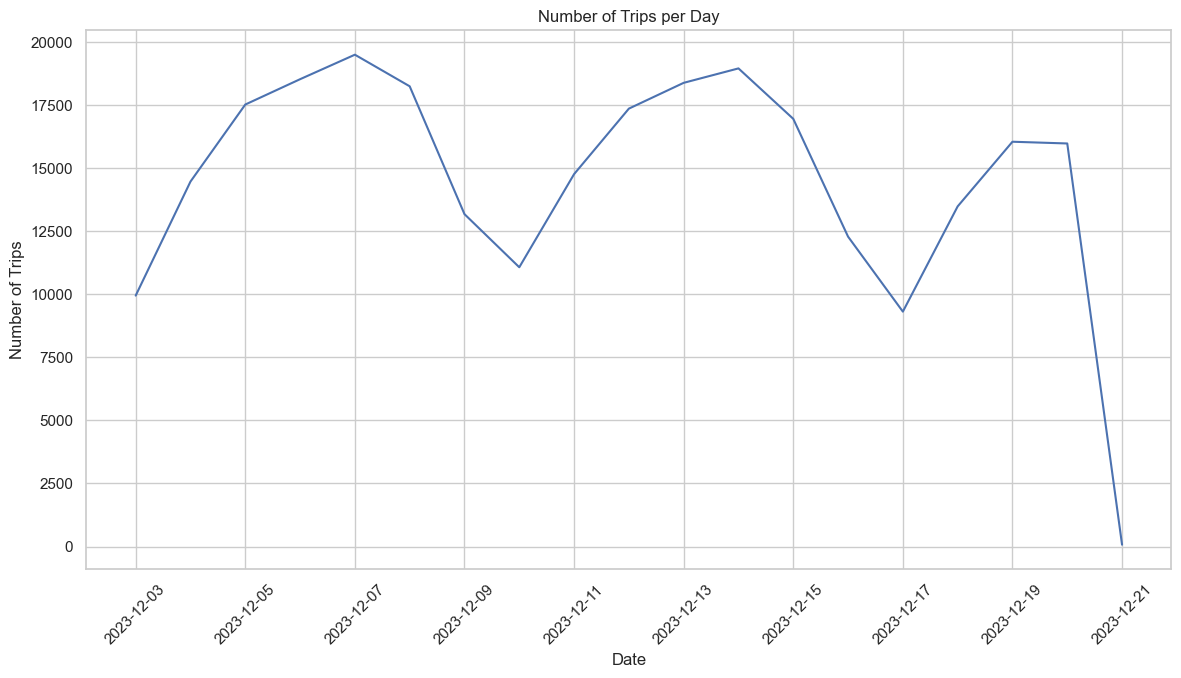

In [60]:
# Example 2: Number of Trips per Day
trips_per_day = trips_full.groupby('trip_start_date').size().reset_index(name='num_trips')
plt.figure(figsize=(14, 7))
sns.lineplot(data=trips_per_day, x='trip_start_date', y='num_trips')
plt.title('Number of Trips per Day')
plt.xlabel('Date')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)
plt.show()

top_10_companies = trips_full['company'].value_counts().nlargest(10).index

# Number of Trips by Top 10 Companies

This code generates a horizontal bar chart displaying the number of trips for the top 10 companies. The plot includes the following elements:

Data Filtering: The dataset is filtered to include only the top 10 companies based on the number of trips.

Count Plot: A count plot is created with company on the Y-axis and the number of trips on the X-axis. The bars are ordered by the frequency of trips, showing which companies have the highest number of trips.

Title and Labels: The plot is titled "Number of Trips by Top 10 Companies" with the X-axis labeled as "Number of Trips" and the Y-axis labeled as "Company."

Top 5 Payment Types: Additionally, the code identifies the top 5 payment types based on their occurrence in the dataset, though this information is not directly visualized in the plot.

This visualization provides insights into the distribution of trips among the top 10 companies, highlighting which companies have the most trips in the dataset.

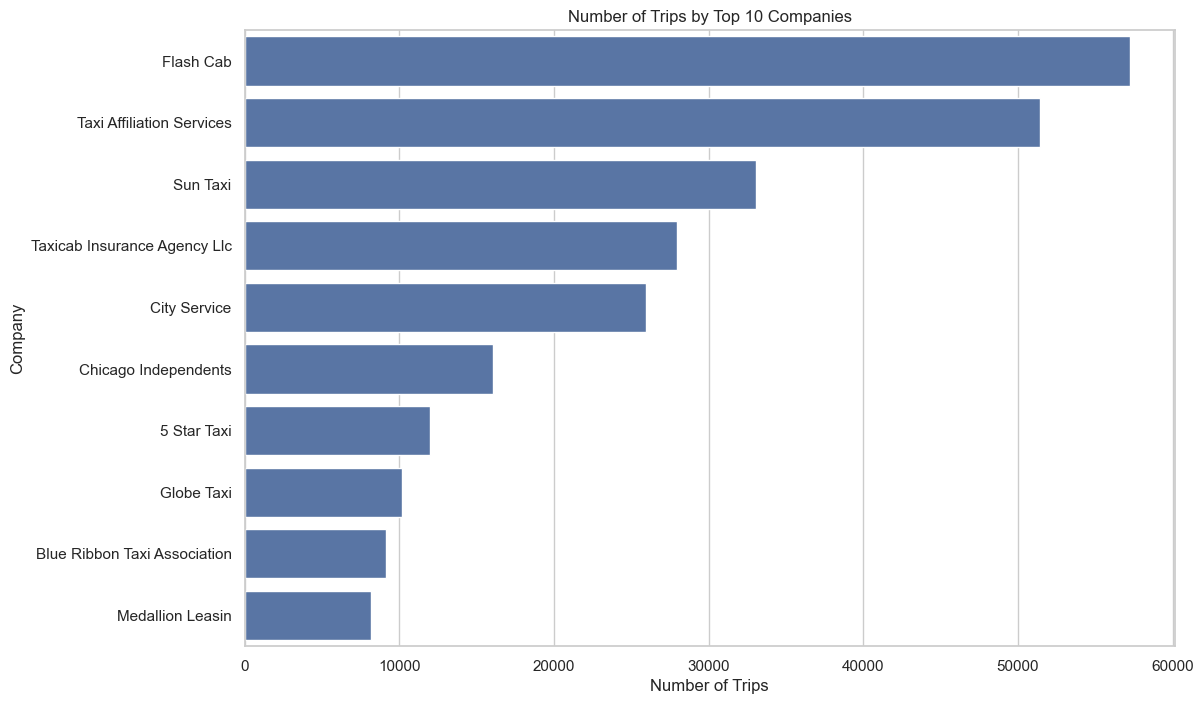

In [61]:
# Filter the dataset to include only the top 10 companies
top_10_trips = trips_full[trips_full['company'].isin(top_10_companies)]

plt.figure(figsize=(12, 8))
sns.countplot(data=top_10_trips, y='company', order=top_10_trips['company'].value_counts().index,)
plt.title('Number of Trips by Top 10 Companies')
plt.xlabel('Number of Trips')
plt.ylabel('Company')
plt.show()

top_5_payment_types = trips_full['payment_type'].value_counts().nlargest(5).index

# Number of Trips by Top 5 Payment Types

This code creates a horizontal bar chart that shows the number of trips for the top 5 payment types. The plot includes the following elements:

Data Filtering: The dataset is filtered to include only the top 5 payment types based on their occurrence.

Count Plot: A count plot is generated with payment_type on the Y-axis and the number of trips on the X-axis. The bars are ordered by the frequency of trips, indicating the most popular payment types.

Title and Labels: The plot is titled "Number of Trips by Top 5 Payment Types," with the X-axis labeled "Number of Trips" and the Y-axis labeled "Payment Type."

This visualization helps to understand which payment methods are most frequently used for taxi trips, highlighting the most common payment types in the dataset.

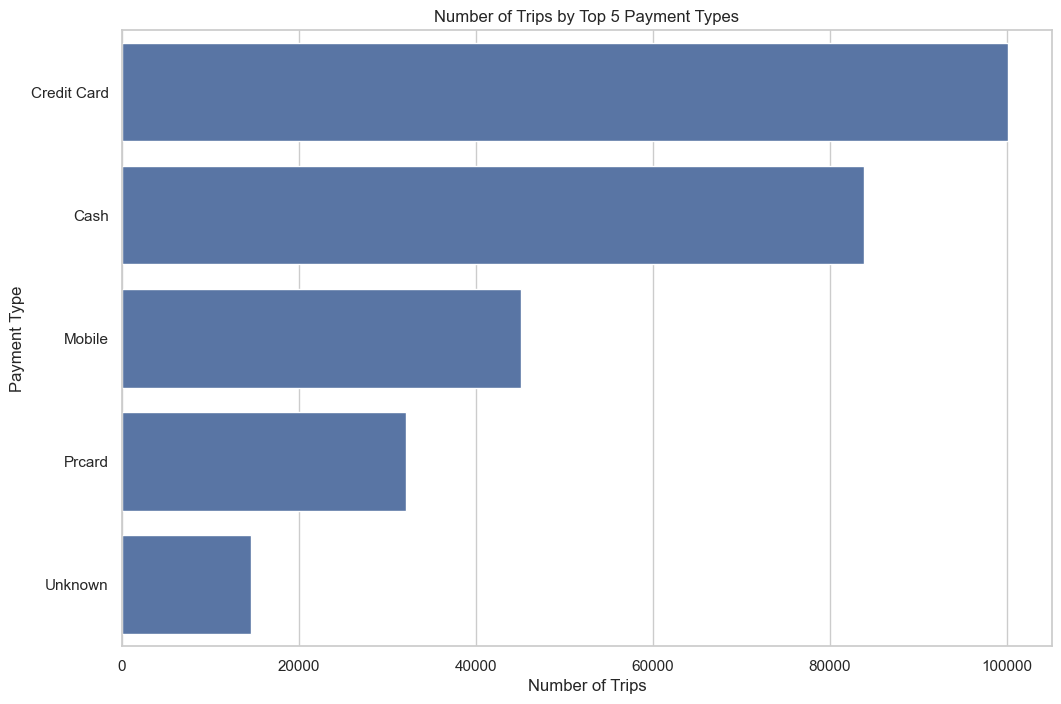

In [62]:
# Filter the dataset to include only the top 5 payment types
top_5_trips = trips_full[trips_full['payment_type'].isin(top_5_payment_types)]

plt.figure(figsize=(12, 8))
sns.countplot(data=top_5_trips, y='payment_type', order=top_5_trips['payment_type'].value_counts().index)
plt.title('Number of Trips by Top 5 Payment Types')
plt.xlabel('Number of Trips')
plt.ylabel('Payment Type')
plt.show()

# Top 10 Most Common Pickup Locations

This code creates a horizontal bar chart displaying the top 10 most common pickup locations based on the number of taxi trips. The plot includes the following elements:

Visualization Style: The style of the plots is set to whitegrid for a clean and organized background.

Custom Vibrant Colormap: A vibrant color map is defined using LinearSegmentedColormap.from_list, featuring a range of colors to distinguish the bars in the plot.

Data Filtering: The dataset is filtered to include only the top 10 pickup locations, determined by the number of trips.

Count Plot: A count plot is generated with pickup_community_area_name on the Y-axis and the number of trips on the X-axis. The bars are colored using the custom vibrant colormap, which provides a visually appealing representation.

Title and Labels: The plot is titled "Top 10 Most Common Pickup Locations," with the X-axis labeled "Number of Trips" and the Y-axis labeled "Pickup Community Area."

This visualization helps to identify the most frequently used pickup locations for taxi trips, providing insights into popular areas based on trip frequency.

C:\Users\rotar\AppData\Local\Temp\ipykernel_2956\1709546059.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=trips_full[trips_full['pickup_community_area_name'].isin(top_10_pickup_areas)],
C:\Users\rotar\AppData\Local\Temp\ipykernel_2956\1709546059.py:15: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.countplot(data=trips_full[trips_full['pickup_community_area_name'].isin(top_10_pickup_areas)],


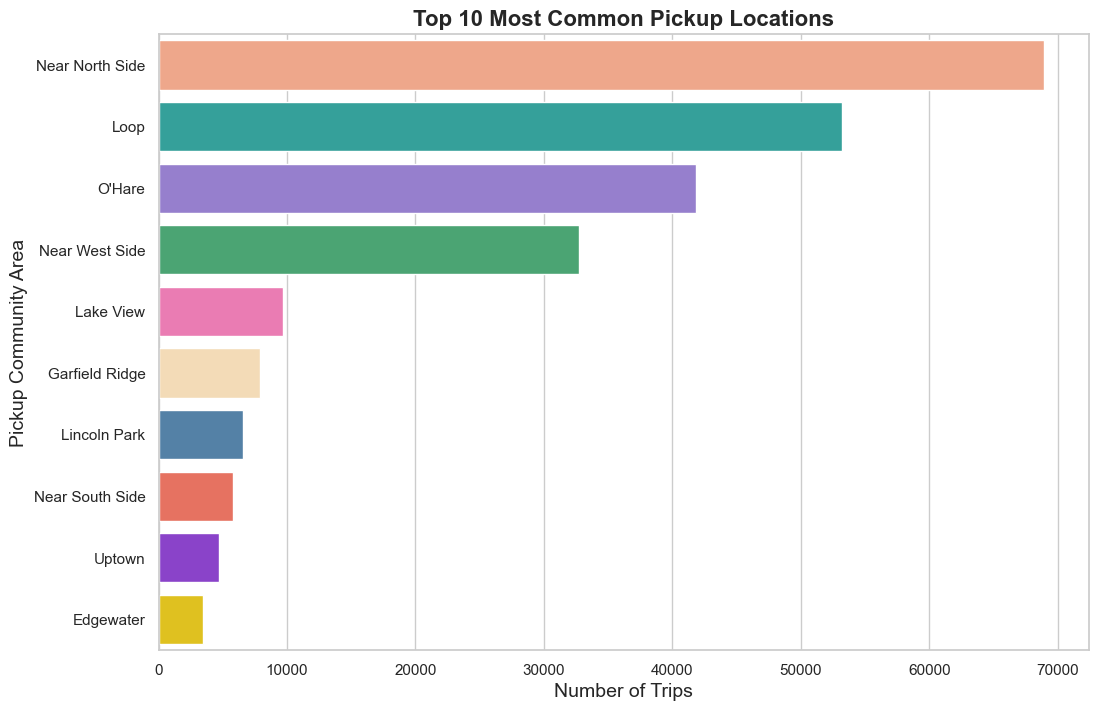

In [64]:
# Set the style of the visualizations
sns.set(style="whitegrid")

# Define a custom vibrant colormap with different colors
vibrant_cmap = LinearSegmentedColormap.from_list('vibrant', 
                                                 ['#ffa07a', '#20b2aa', '#9370db', 
                                                  '#3cb371', '#ff69b4', '#ffdead', 
                                                  '#4682b4', '#ff6347', '#8a2be2', 
                                                  '#ffd700'])
# Example: Most Common Pickup Locations
plt.figure(figsize=(12, 8))
top_10_pickup_areas = trips_full['pickup_community_area_name'].value_counts().nlargest(10).index

# Create the count plot with the vibrant color palette
sns.countplot(data=trips_full[trips_full['pickup_community_area_name'].isin(top_10_pickup_areas)], 
              y='pickup_community_area_name', 
              order=top_10_pickup_areas, 
              palette=vibrant_cmap(np.linspace(0, 1, len(top_10_pickup_areas))))

# Add title and labels
plt.title('Top 10 Most Common Pickup Locations', fontsize=16, fontweight='bold')
plt.xlabel('Number of Trips', fontsize=14)
plt.ylabel('Pickup Community Area', fontsize=14)

# Show the plot
plt.show()


# Top 10 Most Common Dropoff Locations

This code creates a horizontal bar chart that visualizes the top 10 most common dropoff locations for taxi trips. The plot includes the following elements:

Data Extraction: The dataset is analyzed to identify the top 10 dropoff locations based on the number of trips. These locations are determined by counting occurrences in the dropoff_community_area_name column.

Custom Vibrant Colormap: A vibrant colormap is defined using LinearSegmentedColormap.from_list, featuring a diverse range of colors to differentiate the bars in the plot.

Count Plot: A count plot is generated with dropoff_community_area_name on the Y-axis and the number of trips on the X-axis. The bars are colored using the custom vibrant colormap, creating a visually engaging chart.

Title and Labels: The plot is titled "Top 10 Most Common Dropoff Locations," with the X-axis labeled "Number of Trips" and the Y-axis labeled "Dropoff Community Area."

This visualization provides insights into the most frequent dropoff locations, helping to identify popular areas where taxi trips commonly end.

C:\Users\rotar\AppData\Local\Temp\ipykernel_2956\1535743029.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=trips_full[trips_full['dropoff_community_area_name'].isin(top_10_dropoff_areas)],
C:\Users\rotar\AppData\Local\Temp\ipykernel_2956\1535743029.py:11: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.countplot(data=trips_full[trips_full['dropoff_community_area_name'].isin(top_10_dropoff_areas)],


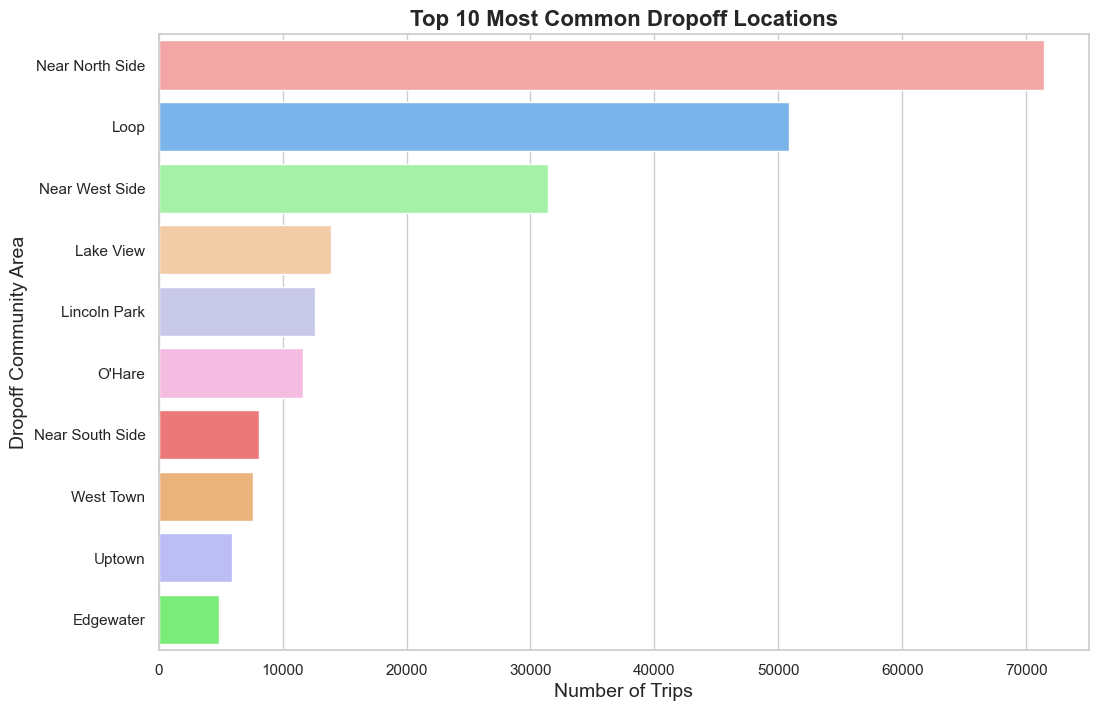

In [65]:
# Example: Most Common Dropoff Locations
plt.figure(figsize=(12, 8))

# Get the top 10 dropoff community areas
top_10_dropoff_areas = trips_full['dropoff_community_area_name'].value_counts().nlargest(10).index

# Define a vibrant color palette
vibrant_cmap = LinearSegmentedColormap.from_list('vibrant', ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6', '#ff6666', '#ffb366', '#b3b3ff', '#66ff66'])

# Create the count plot with the vibrant color palette
sns.countplot(data=trips_full[trips_full['dropoff_community_area_name'].isin(top_10_dropoff_areas)], 
              y='dropoff_community_area_name', 
              order=top_10_dropoff_areas, 
              palette=vibrant_cmap(np.linspace(0, 1, 10)))

# Add title and labels
plt.title('Top 10 Most Common Dropoff Locations', fontsize=16, fontweight='bold')
plt.xlabel('Number of Trips', fontsize=14)
plt.ylabel('Dropoff Community Area', fontsize=14)

# Show the plot
plt.show()



In [36]:
#trips_full.columns

# Distribution of Taxi Trips: Weekends vs. Weekdays

This code generates a pie chart showing the distribution of taxi trips between weekdays and weekends. The chart includes the following elements:

Data Aggregation: The number of trips is counted for weekends and weekdays using the is_weekend column, which categorizes trips into weekends (1) and weekdays (0). Default values are provided to ensure both categories are represented, even if one is missing.

Pie Chart Creation: A pie chart is created to visualize the proportion of trips on weekdays versus weekends. The chart is labeled with percentages and has a slight "explode" effect on the weekday slice to highlight it.

Custom Colors: The chart uses custom colors: blue (#66b3ff) for weekdays and pink (#ff9999) for weekends.

Title and Formatting: The plot is titled "Distribution of Taxi Trips: Weekends vs. Weekdays." The axis('equal') call ensures that the pie chart is drawn as a circle, providing a balanced view.

This visualization helps to compare the frequency of taxi trips on weekdays and weekends, offering insights into the distribution of taxi activity throughout the week.

C:\Users\rotar\AppData\Local\Temp\ipykernel_2956\2262163016.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  weekend_count = weekend_weekday_counts.get(1, 0)  # Default to 0 if key 1 is missing
C:\Users\rotar\AppData\Local\Temp\ipykernel_2956\2262163016.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  weekday_count = weekend_weekday_counts.get(0, 0)  # Default to 0 if key 0 is missing


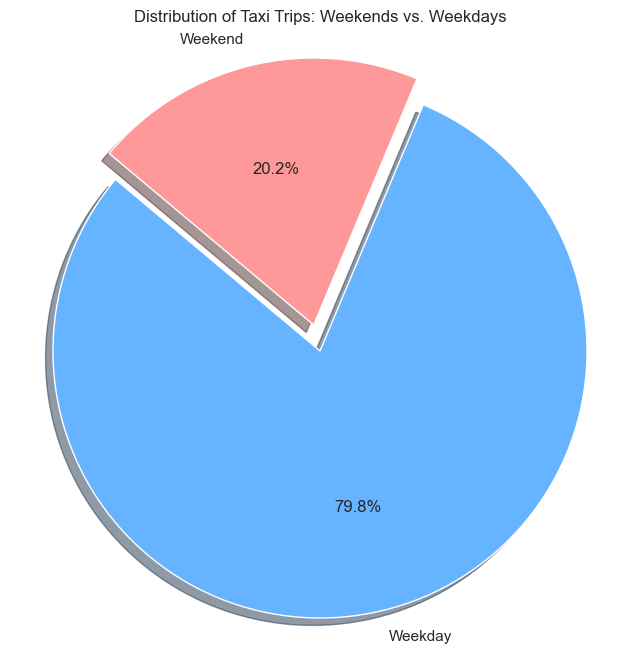

In [66]:
# Count the number of trips for weekends and weekdays
weekend_weekday_counts = trips_full['is_weekend'].value_counts()

# Ensure that both weekend and weekday values exist in the data
weekend_count = weekend_weekday_counts.get(1, 0)  # Default to 0 if key 1 is missing
weekday_count = weekend_weekday_counts.get(0, 0)  # Default to 0 if key 0 is missing

# Define labels and sizes for the pie chart
labels = ['Weekday', 'Weekend']
sizes = [weekday_count, weekend_count]

# Define the explode values for the slices (optional)
explode_slices = (0.1, 0)  # Slightly "explode" the first slice (weekday)

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, explode=explode_slices, shadow=True, colors=['#66b3ff', '#ff9999'])
plt.title('Distribution of Taxi Trips: Weekends vs. Weekdays')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


# Taxi Trips and Rain Over Time

This code creates a dual-axis line plot to visualize the relationship between taxi trips and rainfall over time. The plot includes the following elements:

Data Preparation:
    The trip_start_timestamp column is converted to datetime format.
    The dataset is aggregated to count the number of taxi trips per day.
    The weather data is also converted to datetime format for merging.
    The trips_per_day data is merged with the weather data to include rain information.

Plot Creation:
    Primary Y-Axis (Number of Trips): A line plot shows the number of taxi trips with a gradient color line (blue) and shaded area to enhance visibility.
    Secondary Y-Axis (Rain): A second line plot displays rainfall (in mm) with a green line and shaded area. This is overlaid on the same plot but uses a separate Y-axis to accommodate different scales.

Customization:
    The primary Y-axis (number of trips) is colored blue, and the secondary Y-axis (rain) is colored green.
    The background of the plot and the figure is customized with light and dark shades to improve visual clarity.
    Grid lines are added with dashed lines for better readability.

Legend and Title:
    A legend is included to differentiate between the number of trips and rain.
    The plot is titled "Taxi Trips and Rain Over Time," with enhanced font size and bold formatting for clarity.

This visualization provides insights into how taxi trip counts and rainfall vary over time, helping to analyze potential correlations between weather conditions and taxi activity.

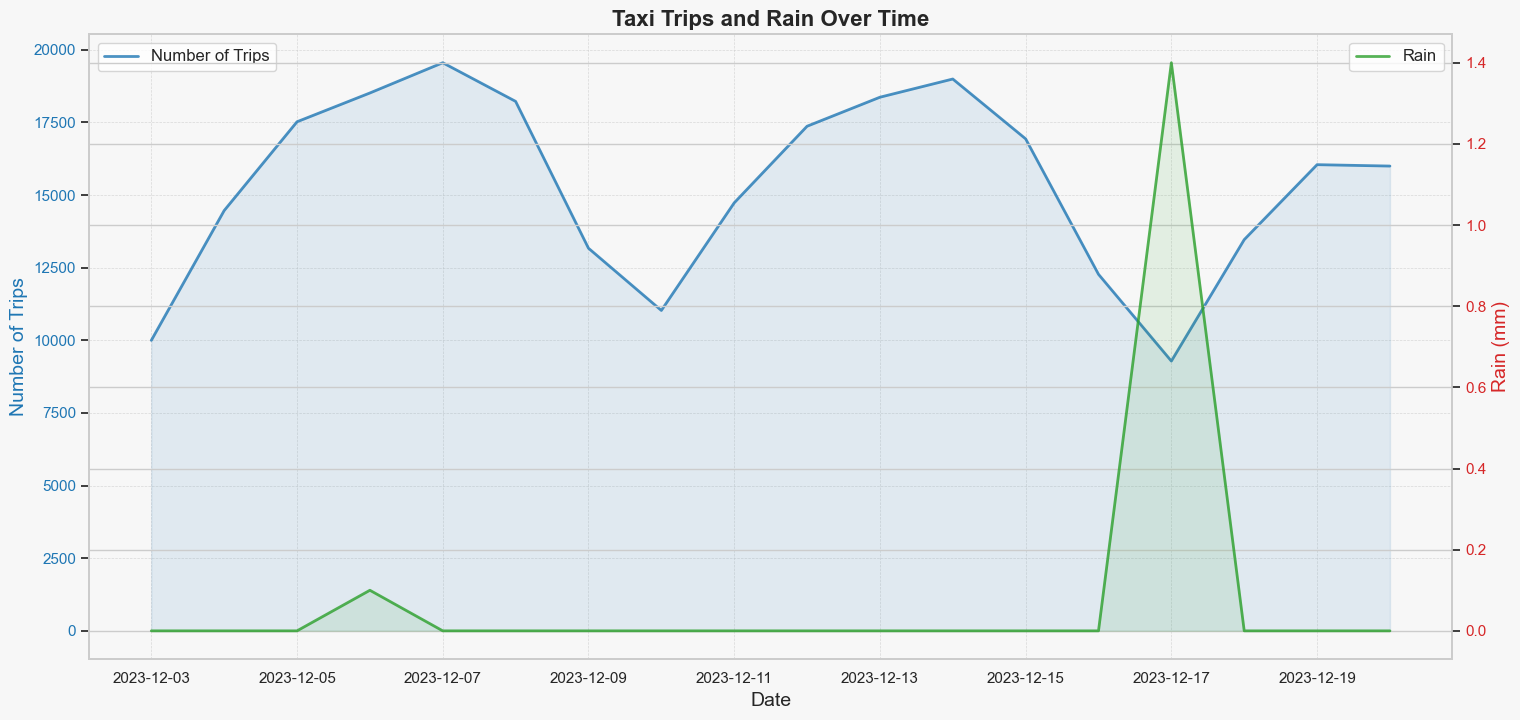

In [67]:
# Convert trip_start_timestamp to datetime if not already done
trips_full['trip_start_timestamp'] = pd.to_datetime(trips_full['trip_start_timestamp'])

# Aggregate the data to get the count of taxi trips per day
trips_per_day = trips_full.resample('D', on='trip_start_timestamp').size().reset_index(name='num_trips')

# Ensure the datetime column in weather data is in datetime format
weather['datetime'] = pd.to_datetime(weather['datetime'])

# Merge the aggregated data with the weather data to get rain 
rain_trips_data = pd.merge(trips_per_day, weather[['datetime', 'rain']], 
                           left_on='trip_start_timestamp', right_on='datetime', how='inner')

# Plot the rain and taxi trip counts
fig, ax1 = plt.subplots(figsize=(16, 8))

# Plotting the number of trips with a gradient color line
ax1.set_xlabel('Date', fontsize=14)
ax1.set_ylabel('Number of Trips', color='tab:blue', fontsize=14)
ax1.plot(rain_trips_data['trip_start_timestamp'], rain_trips_data['num_trips'], 
         color='tab:blue', label='Number of Trips', linewidth=2, alpha=0.8)
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.fill_between(rain_trips_data['trip_start_timestamp'], rain_trips_data['num_trips'], color='tab:blue', alpha=0.1)

# Create a second y-axis to plot the rain 
ax2 = ax1.twinx()
ax2.set_ylabel('Rain (mm)', color='tab:red', fontsize=14)
ax2.plot(rain_trips_data['trip_start_timestamp'], rain_trips_data['rain'], 
         color='tab:green', label='Rain', linewidth=2, alpha=0.8)
ax2.tick_params(axis='y', labelcolor='tab:red')
ax2.fill_between(rain_trips_data['trip_start_timestamp'], rain_trips_data['rain'], color='tab:green', alpha=0.1)

# Customize the grid and background
ax1.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
fig.patch.set_facecolor('#f7f7f7')
ax1.set_facecolor('#f7f7f7')
ax2.set_facecolor('#3498db')

# Adding a legend
ax1.legend(loc='upper left', fontsize=12)
ax2.legend(loc='upper right', fontsize=12)

# Title and show the plot with enhanced font size
plt.title('Taxi Trips and Rain Over Time', fontsize=16, fontweight='bold')
fig.tight_layout(pad=3)
plt.show()


# Total Trip Count per Company

This code creates a horizontal bar chart that displays the total number of taxi trips for each company. The plot includes the following elements:

Data Aggregation:
    The dataset is aggregated to calculate the total trip count per company. This is achieved by counting occurrences of each company in the company column and resetting the index to format the data for plotting.
    The aggregated data is then organized into a DataFrame with columns company and trip_total.

Bar Plot Creation:
    A horizontal bar plot is created with trip_total on the X-axis and company on the Y-axis.
    The bars are colored using a custom palette: blue (#3498db), red (#e74c3c), green (#2ecc71), and purple (#9b59b6).

Title and Labels:
    The plot is titled "Total Trip Count per Company," with the X-axis labeled as "Total Trip Count" and the Y-axis labeled as "Company."

This visualization helps to compare the total number of trips among different taxi companies, providing a clear view of each company's performance based on trip volume.

C:\Users\rotar\AppData\Local\Temp\ipykernel_2956\1385140518.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=trip_total_per_company, x='trip_total', y='company',  palette=['#3498db', '#e74c3c', '#2ecc71', '#9b59b6'])
C:\Users\rotar\AppData\Local\Temp\ipykernel_2956\1385140518.py:7: UserWarning: 
The palette list has fewer values (4) than needed (31) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=trip_total_per_company, x='trip_total', y='company',  palette=['#3498db', '#e74c3c', '#2ecc71', '#9b59b6'])


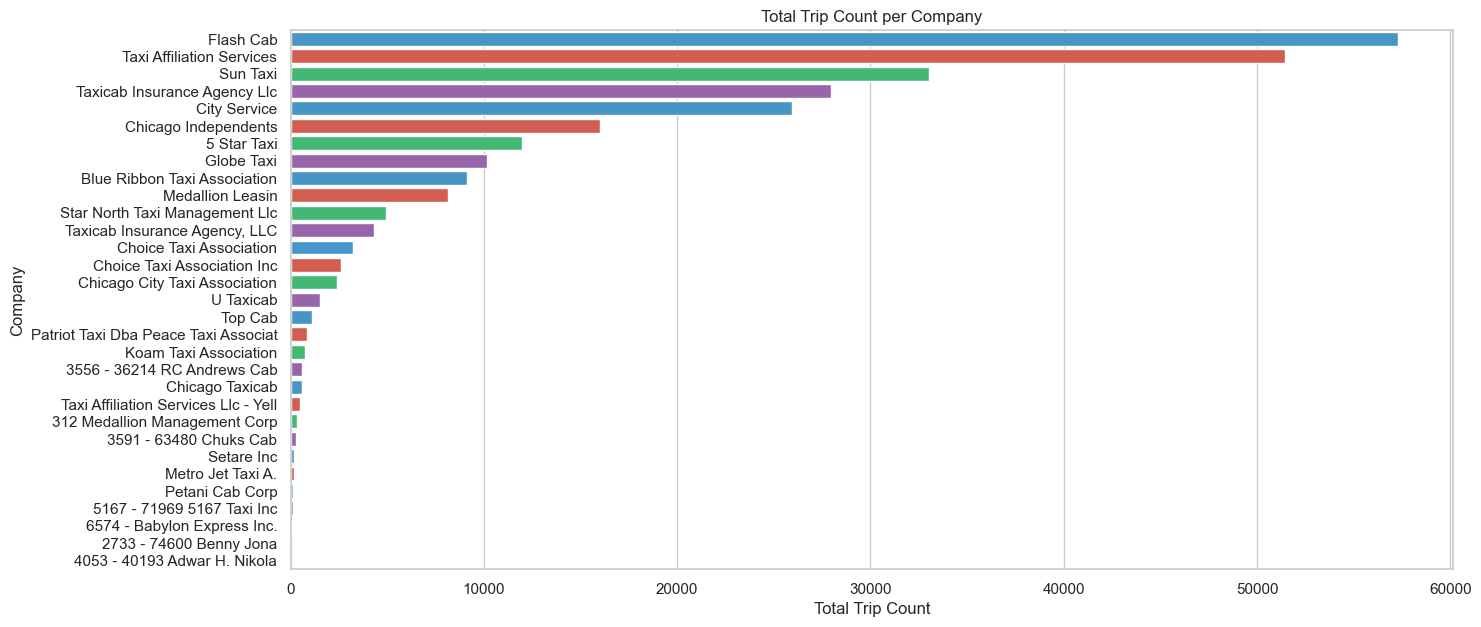

In [68]:
# Aggregate the data to get the total trip count per company
trip_total_per_company = trips_full['company'].value_counts().reset_index()
trip_total_per_company.columns = ['company', 'trip_total']

# Plot the total trip count per company
plt.figure(figsize=(15, 7))
sns.barplot(data=trip_total_per_company, x='trip_total', y='company',  palette=['#3498db', '#e74c3c', '#2ecc71', '#9b59b6'])
plt.title('Total Trip Count per Company')
plt.xlabel('Total Trip Count')
plt.ylabel('Company')
plt.show()